<a href="https://colab.research.google.com/github/fsajad9/Armijo_line/blob/main/CG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
class Sajad:
  def __init__(self,x,y,w,b):
    self.x=x
    self.y=y
    self.w=w
    self.b=b
  def error(self):
    return self.x*self.w+self.b-self.y
  def loss(self):
    return (self.error()*self.error()).mean()
  def grad_b(self):
    return 2*self.error().mean()  
  def grad_w(self):
    return 2*(self.x*self.error()).mean()
  def con(self):
    u=[self.grad_w(),self.grad_b()]
    return np.linalg.norm(u)

  #def step(self):
   # return self.loss()/(self.con()**2+.1)
  def new_step_w(self,alpha):
    return self.w-alpha*self.grad_w()
  def new_step_b(self,alpha):
    return self.b-alpha*self.grad_b()
        
def stt(x,y,w1,b1,c,beta,alpha0,loss,grad_w,grad_b):
  w=np.copy(w1)
  b=np.copy(b1)
  w=w-alpha0*grad_w
  b=b-alpha0*grad_b
  err=w*x+b-y
  loss_new=(err**2).mean()
  u=[grad_w,grad_b]
  norm_g=np.linalg.norm(u)
  it=0
  for i in range(10):
    if loss_new<loss-c*alpha0*np.dot(u,u):
      break

    alpha0=beta*alpha0
    w=w-alpha0*grad_w
    b=b-alpha0*grad_b
    err=w*x+b-y
    loss_new=(err*err).mean()
    
    it=it+1
  return alpha0  




            




  

In [ ]:

def SGD(w,b,x,y,n,n_epoch):
  alpha0=.5
  beta=.75
  c=0.1
  losses=[]
  for i in range(n_epoch):

    ind=np.random.randint(0,n,16)
    x1=x[ind]
    y1=y[ind]
    saj=Sajad(x1,y1,w,b)
    error=saj.error()
    loss=saj.loss()
    losses.append(loss)
    g_w=saj.grad_w()
    g_b=saj.grad_b()
    alpha=stt(x1,y1,w,b,c,beta,alpha0,loss,g_w,g_b)
  
    w=saj.new_step_w(alpha)
    b=saj.new_step_b(alpha)
    alpha0=2*alpha
  return losses,w,b  





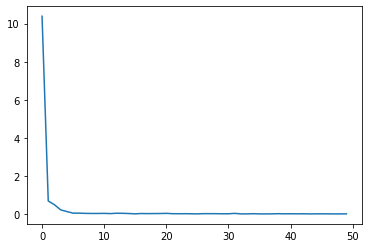

In [ ]:
n=10000
w0=1
b0=2
n_epoch=50
x=np.random.rand(n,1)
ep=np.random.randn(n,1)
y=b0+w0*x+.1*ep
w=np.random.randn(1)
b=np.random.randn(1)

los,w,b=SGD(w,b,x,y,n,n_epoch)
plt.plot(los)

In [ ]:
min(los)

0.0033743200466775725